<a href="https://colab.research.google.com/github/swpnk/Pytorch_MNIST/blob/master/Pytorch_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# !pip install jovian
# !pip install torch
!pip install torchvision 

In [0]:
import torch
import torchvision
from torchvision.datasets import MNIST
import jovian
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
dataset = MNIST("MNIST_Data", download = True)

Extracting MNIST_Data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_Data/MNIST/raw


Extracting MNIST_Data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_Data/MNIST/raw



Extracting MNIST_Data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_Data/MNIST/raw


Extracting MNIST_Data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_Data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [9]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: MNIST_Data
    Split: Train

In [0]:
test_dataset = MNIST(root = "MNIST_Data/", train = False, download=True)

In [14]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7EFE217EA9B0>, 5)

Label 5


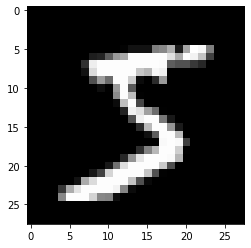

In [21]:
image, label = dataset[0]
plt.imshow(image, cmap = "gray")
print('Label', label)

In [0]:
from torchvision.transforms import transforms

In [0]:
dataset = MNIST(root = "MNIST_Data", train = True, transform=transforms.ToTensor())

In [27]:
image_tensor, label = dataset[0]
print(image_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [29]:
print(image_tensor[:,10:15,10:15], torch.min(image_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]]) tensor(0.)


tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])


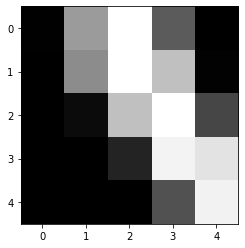

In [33]:
print(image_tensor[0,10:15,10:15])
plt.imshow(image_tensor[0,10:15,10:15], cmap = "gray")

In [34]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [0]:
from torch.utils.data import DataLoader
batch_size = 128
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [37]:
jovian.commit(project = '03-logistic_regression', environment=False)

[jovian] Error: Failed to detect Jupyter notebook or Python script. Skipping..


In [0]:
import torch.nn as nn
input_size = 28*28
num_classes = 10

In [0]:
model = nn.Linear(input_size, num_classes)

In [44]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0285, -0.0261, -0.0342,  ...,  0.0221, -0.0304, -0.0161],
        [-0.0308, -0.0089,  0.0032,  ..., -0.0318, -0.0069, -0.0212],
        [ 0.0291, -0.0189, -0.0026,  ..., -0.0134, -0.0193,  0.0069],
        ...,
        [ 0.0310,  0.0183,  0.0257,  ...,  0.0228,  0.0226,  0.0267],
        [ 0.0235, -0.0144, -0.0342,  ..., -0.0058,  0.0100,  0.0120],
        [-0.0222,  0.0171, -0.0354,  ..., -0.0069, -0.0080,  0.0323]],
       requires_grad=True)

In [45]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0034,  0.0234,  0.0195,  0.0347,  0.0020,  0.0198, -0.0098, -0.0308,
        -0.0034,  0.0277], requires_grad=True)

In [0]:
for images, labels in train_loader:
  print(labels)
  print(images.shape)
  outputs = model(images)

In [0]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):
    xb = xb.reshape(-1,784)
    out = self.linear(xb)
    return out

model = MnistModel()

In [50]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0311, -0.0092, -0.0125,  ...,  0.0302,  0.0025,  0.0030],
         [-0.0270,  0.0007,  0.0296,  ..., -0.0286,  0.0278,  0.0179],
         [ 0.0288,  0.0118,  0.0056,  ...,  0.0019,  0.0109, -0.0356],
         ...,
         [ 0.0155,  0.0040, -0.0203,  ...,  0.0119,  0.0241,  0.0058],
         [-0.0115,  0.0268, -0.0293,  ...,  0.0199,  0.0126,  0.0119],
         [ 0.0320,  0.0281,  0.0118,  ...,  0.0113,  0.0123,  0.0120]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0059, -0.0204,  0.0111, -0.0071, -0.0215,  0.0318,  0.0030,  0.0094,
          0.0338,  0.0038], requires_grad=True)]

In [52]:
for images, labels in train_loader:
  outputs = model(images)
  break

print(outputs.shape, outputs[:2].data)

torch.Size([128, 10]) tensor([[ 0.0774, -0.1222, -0.1027, -0.0690, -0.0991, -0.0813,  0.0780, -0.2960,
          0.2848, -0.1168],
        [ 0.1206,  0.0132,  0.1025,  0.0834, -0.0009, -0.0210, -0.0421, -0.0082,
          0.1914, -0.1593]])


In [0]:
exps = torch.exp(outputs[0])

In [0]:
probs = exps / torch.sum(exps)

In [59]:
torch.sum(probs)

tensor(1., grad_fn=<SumBackward0>)

In [0]:
import torch.nn.functional as F

In [0]:
probs = F.softmax(outputs, dim = 1)

In [63]:
probs.shape

torch.Size([128, 10])

In [65]:
maxprobs, preds = torch.max(probs, dim = 1)
print(preds)
print(maxprobs)

tensor([8, 8, 7, 2, 0, 1, 8, 6, 1, 1, 0, 1, 1, 8, 9, 8, 1, 1, 6, 1, 0, 8, 2, 6,
        1, 8, 5, 8, 1, 2, 1, 8, 0, 6, 2, 0, 2, 8, 7, 2, 6, 5, 1, 6, 8, 1, 1, 1,
        1, 6, 8, 6, 6, 2, 8, 0, 2, 1, 1, 8, 8, 1, 1, 6, 2, 1, 1, 8, 1, 1, 6, 1,
        1, 0, 1, 8, 1, 6, 5, 1, 0, 2, 1, 0, 0, 1, 2, 2, 4, 6, 1, 1, 6, 6, 1, 6,
        0, 9, 1, 8, 0, 6, 6, 0, 1, 1, 2, 1, 1, 1, 8, 8, 8, 8, 8, 6, 8, 5, 1, 5,
        8, 0, 1, 1, 6, 8, 1, 6])
tensor([0.1374, 0.1172, 0.1328, 0.1356, 0.1314, 0.1273, 0.1268, 0.1197, 0.1363,
        0.1312, 0.1117, 0.1378, 0.1273, 0.1317, 0.1042, 0.1225, 0.1218, 0.1273,
        0.1260, 0.1363, 0.1319, 0.1175, 0.1167, 0.1700, 0.1174, 0.1227, 0.1202,
        0.1205, 0.1247, 0.1162, 0.1393, 0.1249, 0.1254, 0.1418, 0.1131, 0.1259,
        0.1131, 0.1248, 0.1191, 0.1188, 0.1305, 0.1200, 0.1385, 0.1463, 0.1318,
        0.1335, 0.1228, 0.1230, 0.1311, 0.1347, 0.1211, 0.1756, 0.1387, 0.1347,
        0.1355, 0.1296, 0.1209, 0.1230, 0.1277, 0.1323, 0.1355, 0.1108, 0.1379,
       

In [66]:
labels

tensor([1, 1, 4, 3, 3, 8, 3, 8, 0, 7, 1, 2, 7, 6, 3, 7, 3, 9, 2, 7, 7, 4, 5, 6,
        9, 8, 2, 1, 6, 9, 0, 1, 2, 4, 1, 4, 6, 1, 2, 5, 5, 2, 0, 0, 1, 0, 3, 8,
        9, 2, 1, 0, 0, 5, 1, 1, 3, 4, 0, 9, 1, 4, 5, 0, 5, 7, 9, 1, 8, 7, 6, 3,
        0, 2, 4, 8, 4, 0, 2, 0, 5, 3, 7, 8, 3, 2, 3, 5, 6, 2, 0, 8, 2, 5, 0, 6,
        4, 7, 2, 7, 1, 6, 7, 3, 9, 8, 0, 8, 4, 5, 7, 8, 2, 6, 6, 8, 1, 1, 7, 5,
        9, 3, 7, 7, 6, 8, 9, 2])

In [0]:
loss_fn = F.cross_entropy

In [0]:
loss = loss_fn(outputs, labels)

In [69]:
print(loss)

tensor(2.3407, grad_fn=<NllLossBackward>)


In [0]:
for epoch in range(num_epochs)